In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})


# 训练集：

In [2]:
训练放款时间表 = pd.read_csv("D:/rong360DC/creditData/train/loan_time_train.txt",header=None,names=['用户标识','放款时间'])
训练放款时间表['放款时间']=训练放款时间表['放款时间']//86400   # 86400是对时间做的处理

In [3]:
训练用户表 = pd.read_csv("D:/rong360DC/creditData/train/user_info_train.txt",header=None,
                    names=['用户标识','用户性别','用户职业','用户教育程度',
                           '用户婚姻状态', '用户户口类型'])

In [4]:
训练信用卡账单表=pd.read_csv("D:/rong360DC/creditData/train/bill_detail_train.txt",header=None,
                    names=['用户标识','时间','银行标识','上期账单金额','上期还款金额','信用卡额度',
                           '本期账单余额','本期账单最低还款额','消费笔数','本期账单金额','调整金额',
                          '循环利息','可用余额','预借现金额度','还款状态'])

In [5]:
训练信用卡账单表['时间']=训练信用卡账单表['时间']//86400

In [6]:
训练信用卡账单表 = pd.merge(训练信用卡账单表, 训练放款时间表,how='inner', on = "用户标识")

In [7]:
用户浏览行为 = pd.read_csv("D:/rong360DC/creditData/train/browse_history_train.txt",header=None,
                    names=['用户标识', '浏览时间', '浏览行为数据', '浏览子行为编号'])
用户浏览行为['浏览时间']=用户浏览行为['浏览时间']//86400

In [8]:
银行流水记录=pd.read_csv("D:/rong360DC/creditData/train/bank_detail_train.txt", header = None,
                                                         names=["用户标识", "流水时间", "交易类型", "交易金额", "工资收入标记"])  
银行流水记录['流水时间']=银行流水记录['流水时间']//86400

In [9]:
训练表 = pd.read_csv("D:/rong360DC/creditData/train/overdue_train.txt",header=None,
                    names=['用户标识','标签'])

In [10]:
训练表 = pd.merge(训练表,训练用户表,how='inner',on = "用户标识")
训练表 = pd.merge(训练表,训练放款时间表,how='inner',on = "用户标识")

#  测试集：

In [11]:
测试放款时间表 = pd.read_csv("D:/rong360DC/creditData/test/loan_time_test.txt",header=None,names=['用户标识','放款时间'])

In [12]:
测试放款时间表['放款时间']=测试放款时间表['放款时间']//86400

In [13]:
测试用户表 = pd.read_csv("D:/rong360DC/creditData/test/user_info_test.txt",header=None,
                    names=['用户标识','用户性别','用户职业','用户教育程度',
                           '用户婚姻状态', '用户户口类型'])

In [14]:
测试信用卡账单表=pd.read_csv("D:/rong360DC/creditData/test/bill_detail_test.txt",header=None,
                    names=['用户标识','时间','银行标识','上期账单金额','上期还款金额','信用卡额度',
                           '本期账单余额','本期账单最低还款额','消费笔数','本期账单金额','调整金额',
                          '循环利息','可用余额','预借现金额度','还款状态'])
测试信用卡账单表['时间']=测试信用卡账单表['时间']//86400

In [15]:
测试信用卡账单表 = pd.merge(测试信用卡账单表, 测试放款时间表,how='inner', on = '用户标识')

In [16]:
测试用户浏览行为 = pd.read_csv("D:/rong360DC/creditData/test/browse_history_test.txt",header=None,
                    names=['用户标识','浏览时间','浏览行为数据','浏览子行为编号'])
测试用户浏览行为['浏览时间'] = 测试用户浏览行为['浏览时间']//86400

In [17]:
测试银行流水记录=pd.read_csv("D:/rong360DC/creditData/test/bank_detail_test.txt", header = None,
                                                         names=["用户标识", "流水时间", "交易类型", "交易金额", "工资收入标记"])    
测试银行流水记录['流水时间']=测试银行流水记录['流水时间']//86400

In [18]:

测试表 = pd.read_csv("D:/rong360DC/creditData/test/usersID_test.txt",header=None,
                    names=['用户标识','标签'])

In [19]:
测试表 = pd.merge(测试表,测试用户表,how='inner',on = "用户标识")
测试表 = pd.merge(测试表,测试放款时间表,how='inner',on = "用户标识")

## EDA:
#### 用户基本属性分析:user_info.txt

In [20]:
性别分布=训练表.groupby('用户性别',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
性别分布['性别逾期比']=性别分布['逾期']/性别分布['总数']
性别分布

,用户性别,逾期,总数,性别逾期比
0,0,654,1669,0.391851
1,1,5638,44254,0.127401
2,2,891,9673,0.092112


In [21]:

职业分布=训练表.groupby('用户职业',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
职业分布['职业逾期比']=职业分布['逾期']/职业分布['总数']
职业分布

,用户职业,逾期,总数,职业逾期比
0,0,75,368,0.203804
1,1,17,93,0.182796
2,2,5204,41150,0.126464
3,3,746,5898,0.126484
4,4,1141,8087,0.141091


In [22]:
用户婚姻状态=训练表.groupby('用户婚姻状态',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
用户婚姻状态['婚姻逾期比']=用户婚姻状态['逾期']/用户婚姻状态['总数']
用户婚姻状态

,用户婚姻状态,逾期,总数,婚姻逾期比
0,0,75,370,0.202703
1,1,3169,25098,0.126265
2,2,805,6038,0.133322
3,3,2909,22554,0.128979
4,4,210,1471,0.142760
5,5,15,65,0.230769


In [23]:

教育程度分布=训练表.groupby('用户教育程度',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
教育程度分布['教育程度逾期比']=教育程度分布['逾期']/教育程度分布['总数']
教育程度分布

,用户教育程度,逾期,总数,教育程度逾期比
0,0,75,369,0.203252
1,1,18,226,0.079646
2,2,813,8483,0.095839
3,3,2977,23530,0.126519
4,4,3300,22988,0.143553


In [24]:
用户户口类型=训练表.groupby('用户户口类型',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
用户户口类型['户口类型逾期比']=用户户口类型['逾期']/用户户口类型['总数']
用户户口类型

,用户户口类型,逾期,总数,户口类型逾期比
0,0,75,369,0.203252
1,1,2033,17105,0.118854
2,2,2145,15557,0.137880
3,3,978,8216,0.119036
4,4,1952,14349,0.136037


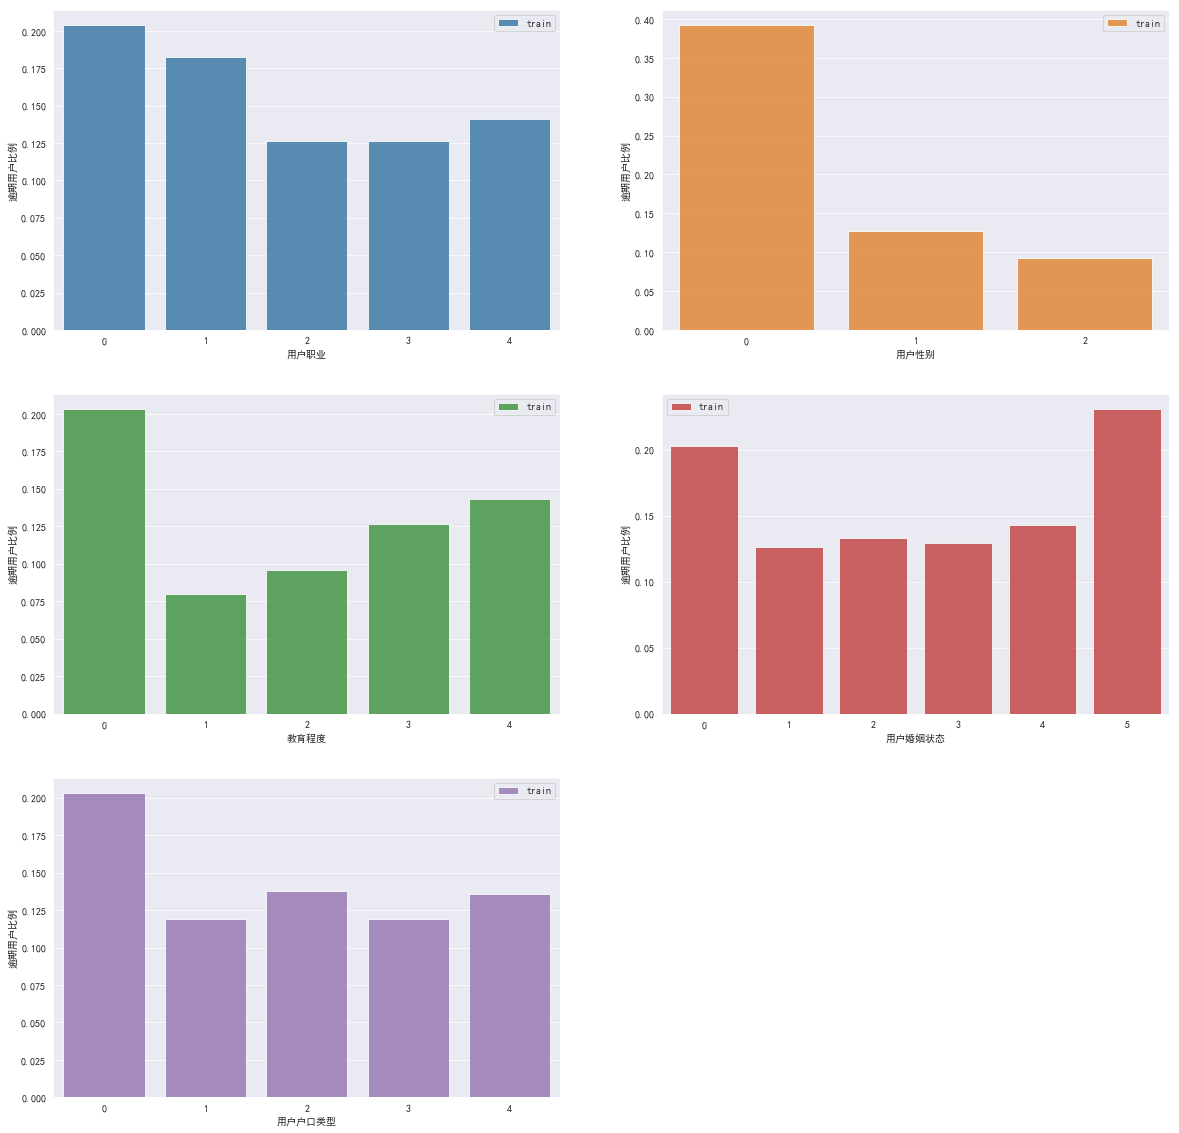

In [25]:
fig = plt.figure(figsize=(20, 20))


ax1 = fig.add_subplot(3, 2, 1)
ax1=sns.barplot(职业分布.index, 职业分布.逾期/职业分布.总数, alpha=0.8, color=p[0], label='train')
ax1.legend()
#ax1.set_title(u'职业分布情况') 
ax1.set_xlabel(u'用户职业')
ax1.set_ylabel(u'逾期用户比例')

ax2 = fig.add_subplot(3, 2, 2)
ax2=sns.barplot(性别分布.index, 性别分布.逾期/性别分布.总数, alpha=0.8, color=p[1], label='train')
ax2.legend()
#ax2.set_title(u'性别分布情况') 
ax2.set_xlabel(u'用户性别')
ax2.set_ylabel(u'逾期用户比例')

ax3 = fig.add_subplot(3, 2, 3)
ax3=sns.barplot(教育程度分布.index, 教育程度分布.逾期/教育程度分布.总数, alpha=0.8, color=p[2], label='train')
ax3.legend()
#ax3.set_title(u'教育程度分布') 
ax3.set_xlabel(u'教育程度')
ax3.set_ylabel(u'逾期用户比例')

ax4 = fig.add_subplot(3, 2, 4)
ax4=sns.barplot(用户婚姻状态.index, 用户婚姻状态.逾期/用户婚姻状态.总数, alpha=0.8, color=p[3], label='train')
ax4.legend()
#ax4.set_title(u'用户婚姻状态') 
ax4.set_xlabel(u'用户婚姻状态')
ax4.set_ylabel(u'逾期用户比例')

ax5 = fig.add_subplot(3, 2, 5)
ax5=sns.barplot(用户户口类型.index, 用户户口类型.逾期/用户户口类型.总数, alpha=0.8, color=p[4], label='train')
ax5.legend()
#ax5.set_title(u'用户户口类型') 
ax5.set_xlabel(u'用户户口类型')
ax5.set_ylabel(u'逾期用户比例')

plt.show()


## 信用卡账单表分析:bill_detail.txt

#### 每个用户账单时间>放款时间的账单数

In [26]:
t1=训练信用卡账单表[(训练信用卡账单表['时间']>训练信用卡账单表['放款时间'])].groupby("用户标识",as_index=False)
t2=训练信用卡账单表[(训练信用卡账单表['时间']>训练信用卡账单表['放款时间']+1)].groupby("用户标识",as_index=False)
t3=训练信用卡账单表[(训练信用卡账单表['时间']>训练信用卡账单表['放款时间']+2)].groupby("用户标识",as_index=False)

In [27]:
x=t1['时间'].apply(lambda x:np.unique(x).size)
x1=t1['时间'].agg({'t1' : 'count'})
x1['x1']=x

x=t2['时间'].apply(lambda x:np.unique(x).size)
x2=t2['时间'].agg({'t2' : 'count'})
x2['x2']=x

x=t3['时间'].apply(lambda x:np.unique(x).size)
x3=t3['时间'].agg({'t3' : 'count'})
x3['x3']=x

In [28]:
训练表=pd.merge(训练表,x1,how='left',on = "用户标识")
训练表=pd.merge(训练表,x2,how='left',on = "用户标识")
训练表=pd.merge(训练表,x3,how='left',on = "用户标识")
训练表=训练表.fillna(0)

In [29]:

d=训练表
l0_x1=d[(d['标签']==0)].groupby("x1",as_index=False)
l1_x1=d[(d['标签']==1)].groupby("x1",as_index=False)

l0_x1=l0_x1['x1'].agg({'l0_x1' : 'count'})#标签为0
l1_x1=l1_x1['x1'].agg({'l1_x1' : 'count'})#标签为1

D:\anaconda\setiing\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\setiing\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\setiing\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\setiing\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\setiing\lib\site-

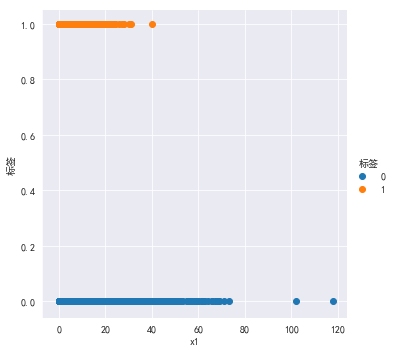

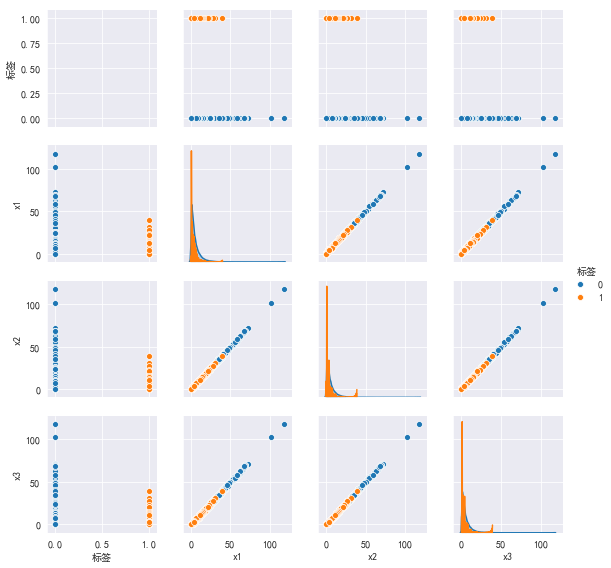

In [30]:
sns.FacetGrid(d, hue="标签", size=5).map(plt.scatter, "x1", "标签").add_legend()
xxx=d[['标签','x1','x2','x3']]
sns.pairplot(xxx, hue="标签", size=2)

## 银行流水记录分析:bank_detail.txt

#### 统计用户总(或者每月...)支出与收入的差值

In [31]:
训练银行流水记录表 = pd.merge(银行流水记录,训练放款时间表,how='left',on = "用户标识")

In [32]:
用户支出=训练银行流水记录表[(训练银行流水记录表['交易类型']==1)].groupby("用户标识",as_index=False)
用户收入=训练银行流水记录表[(训练银行流水记录表['交易类型']==0)].groupby("用户标识",as_index=False)
用户工资收入=训练银行流水记录表[(训练银行流水记录表['工资收入标记']==1)].groupby("用户标识",as_index=False)

In [33]:
用户支出=用户支出['交易金额'].agg({'用户支出' : 'sum'})
用户收入=用户收入['交易金额'].agg({'用户收入' : 'sum'})
用户工资收入=用户工资收入['交易金额'].agg({'用户工资收入' : 'sum'})

In [34]:
统计表 = 训练表

In [35]:
统计表=pd.merge(统计表,用户支出,how='left',on = "用户标识")
统计表=pd.merge(统计表,用户收入,how='left',on = "用户标识")
统计表=pd.merge(统计表,用户工资收入,how='left',on = "用户标识")

In [36]:
统计表=统计表.fillna(0)
统计表['入不敷出指数']=统计表['用户支出']-统计表['用户收入']

D:\anaconda\setiing\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


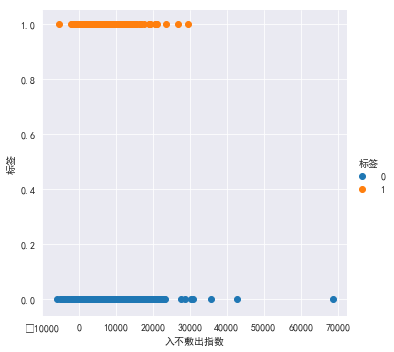

In [37]:
sns.FacetGrid(统计表, hue="标签", size=5).map(plt.scatter, "入不敷出指数", "标签").add_legend()

## 特征集可视化:

In [38]:
trains = pd.read_csv("D:\\rong360DC\\creditData\\feature\\test_20190303_A.csv",encoding="gb2312") # 注意自己数据路径
tests = pd.read_csv("D:\\rong360DC\\creditData\\feature\\train_20190303_A.csv",encoding="gb2312") # 注意自己数据路径

D:\anaconda\setiing\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


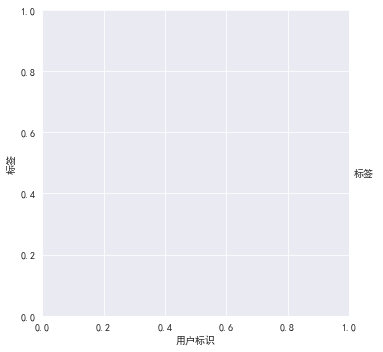

In [39]:
sns.FacetGrid(trains, hue="标签", size=5).map(plt.scatter, "用户标识", "标签").add_legend()

D:\anaconda\setiing\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "['放款前账单还款差额' '放款后账单还款差额' '放款前账单最大值还款差额(去重)' '放款后账单最大值还款差额(去重)'] not in index"

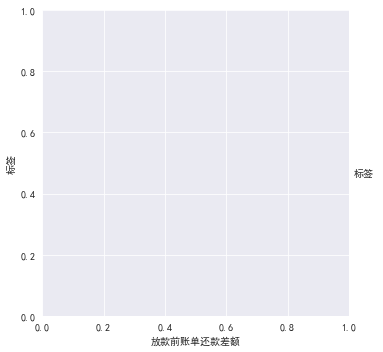

In [40]:
sns.FacetGrid(trains, hue="标签", size=5).map(plt.scatter, "放款前账单还款差额", "标签").add_legend()
xxx=trains[['标签','放款前账单还款差额','放款后账单还款差额','放款前账单最大值还款差额(去重)','放款后账单最大值还款差额(去重)']]
sns.pairplot(xxx, hue="标签", size=5)

In [ ]:

统计表=pd.merge(统计表, 性别分布,how='inner', on = '用户性别')
统计表=pd.merge(统计表, 职业分布,how='inner', on = '用户职业')
统计表=pd.merge(统计表, 用户婚姻状态,how='inner', on = '用户婚姻状态')
统计表=pd.merge(统计表, 教育程度分布,how='inner', on = '用户教育程度')
统计表=pd.merge(统计表, 用户户口类型,how='inner', on = '用户户口类型')

In [ ]:
预测表=统计表
预测表['bank预测']=预测表['入不敷出指数']
预测表['bank预测']=预测表['bank预测']-min(预测表['bank预测'])
预测表['bank预测']=预测表['bank预测']/max(预测表['bank预测'])


In [ ]:
预测表['bill预测']=-(预测表['x1']+1)*(预测表['x2']+1)*(预测表['x3']+1)
预测表['bill预测']=预测表['bill预测']-min(预测表['bill预测'])
预测表['bill预测']=预测表['bill预测']/max(预测表['bill预测'])

In [ ]:
预测表['user预测']=0.1*预测表['职业逾期比']+0.3*预测表['婚姻逾期比']+0.1*预测表['教育程度逾期比']+0.1*预测表['户口类型逾期比']+0.4*预测表['性别逾期比']

In [ ]:

预测表['预测']=预测表['bill预测']+0.1*预测表['bank预测']+0.3*预测表['user预测']

In [ ]:
print(ks(预测表['bill预测'],预测表['标签']))
print(ks(预测表['bank预测'],预测表['标签']))
print(ks(预测表['user预测'],预测表['标签']))
print(ks(预测表['预测'],预测表['标签']))